In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")


In [2]:
#Importing dataset
df=pd.read_csv("C:/Users/HP/Desktop/diabetes_prediction_dataset.csv")

In [3]:
# number of rows and Columns in this dataset
df.shape

(100000, 9)

In [4]:
# getting the statistical measures of the data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

# For finding missing values

In [6]:
df.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [8]:
df.duplicated().shape

(100000,)

In [9]:
df.duplicated().sum()

3854

In [10]:
df1 = df.drop_duplicates()

In [11]:
df1.duplicated().sum()

0

In [12]:
# separating the data and labels
X = df1.drop(columns = 'diabetes', axis=1)
Y = df1['diabetes']

In [13]:
print(X)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1              

In [14]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64


In [15]:
x2 = ['hypertension', 'gender', 'heart_disease','smoking_history','diabetes']

In [16]:
x3 = df1.drop(columns=x2)
print(x3)

        age    bmi  HbA1c_level  blood_glucose_level
0      80.0  25.19          6.6                  140
1      54.0  27.32          6.6                   80
2      28.0  27.32          5.7                  158
3      36.0  23.45          5.0                  155
4      76.0  20.14          4.8                  155
...     ...    ...          ...                  ...
99994  36.0  24.60          4.8                  145
99996   2.0  17.37          6.5                  100
99997  66.0  27.83          5.7                  155
99998  24.0  35.42          4.0                  100
99999  57.0  22.43          6.6                   90

[96146 rows x 4 columns]


In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(x3)

StandardScaler()

In [19]:
standardized_data = scaler.transform(x3)
print(standardized_data)

[[ 1.70083970e+00 -3.14947071e-01  9.94562951e-01  4.35538650e-02]
 [ 5.43372045e-01 -2.15895425e-04  9.94562951e-01 -1.42309603e+00]
 [-6.14095608e-01 -2.15895425e-04  1.55970122e-01  4.83548835e-01]
 ...
 [ 1.07758788e+00  7.51422735e-02  1.55970122e-01  4.10216340e-01]
 [-7.92167555e-01  1.19664914e+00 -1.42803856e+00 -9.34212734e-01]
 [ 6.76926005e-01 -7.22767750e-01  9.94562951e-01 -1.17865438e+00]]


In [20]:
x4 = ['hypertension', 'age', 'heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']
print(x4)

['hypertension', 'age', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [21]:
x5 = df1.drop(columns=x4)
print(x5)

       gender smoking_history
0      Female           never
1      Female         No Info
2        Male           never
3      Female         current
4        Male         current
...       ...             ...
99994  Female         No Info
99996  Female         No Info
99997    Male          former
99998  Female           never
99999  Female         current

[96146 rows x 2 columns]


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [24]:
# Perform label encoding
gender=['male','female']
label_encoder = LabelEncoder()
encoded_gender = label_encoder.fit_transform(gender)
print(encoded_gender)

[1 0]


In [25]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [26]:
smoking_history=['No Info','never','former','current','not current','ever']
label_encoder = LabelEncoder()
encoded_smoking_history = label_encoder.fit_transform(smoking_history)
print(encoded_smoking_history)

[0 4 3 1 5 2]


In [27]:
# Sample data
data = {'gender': ['male', 'female', 'male', 'female', 'male', 'female'],
        'smoking_history': ['No Info', 'never', 'former', 'current', 'not current', 'ever']}

# Ensure equal-length arrays
max_len = max(len(data['gender']), len(data['smoking_history']))
data['gender'] = data['gender'] * (max_len // len(data['gender']))
data['smoking_history'] = data['smoking_history'] * (max_len // len(data['smoking_history']))

# Create DataFrame
df2 = pd.DataFrame(data)

# Encode categorical variables
encoder = LabelEncoder()
df2['gender'] = encoder.fit_transform(df2['gender'])
df2['smoking_history'] = encoder.fit_transform(df2['smoking_history'])

# Print encoded DataFrame
print(df2)

   gender  smoking_history
0       1                0
1       0                4
2       1                3
3       0                1
4       1                5
5       0                2


In [28]:
X2 = pd.concat([x3, df2], axis=1).fillna(0)  # Concatenate along columns
print("Concatenated DataFrame:")
print(X2)

Concatenated DataFrame:
        age    bmi  HbA1c_level  blood_glucose_level  gender  smoking_history
0      80.0  25.19          6.6                  140     1.0              0.0
1      54.0  27.32          6.6                   80     0.0              4.0
2      28.0  27.32          5.7                  158     1.0              3.0
3      36.0  23.45          5.0                  155     0.0              1.0
4      76.0  20.14          4.8                  155     1.0              5.0
...     ...    ...          ...                  ...     ...              ...
99994  36.0  24.60          4.8                  145     0.0              0.0
99996   2.0  17.37          6.5                  100     0.0              0.0
99997  66.0  27.83          5.7                  155     0.0              0.0
99998  24.0  35.42          4.0                  100     0.0              0.0
99999  57.0  22.43          6.6                   90     0.0              0.0

[96146 rows x 6 columns]


In [29]:
X2.isna().any()

age                    False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
gender                 False
smoking_history        False
dtype: bool

In [30]:
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<AxesSubplot: >

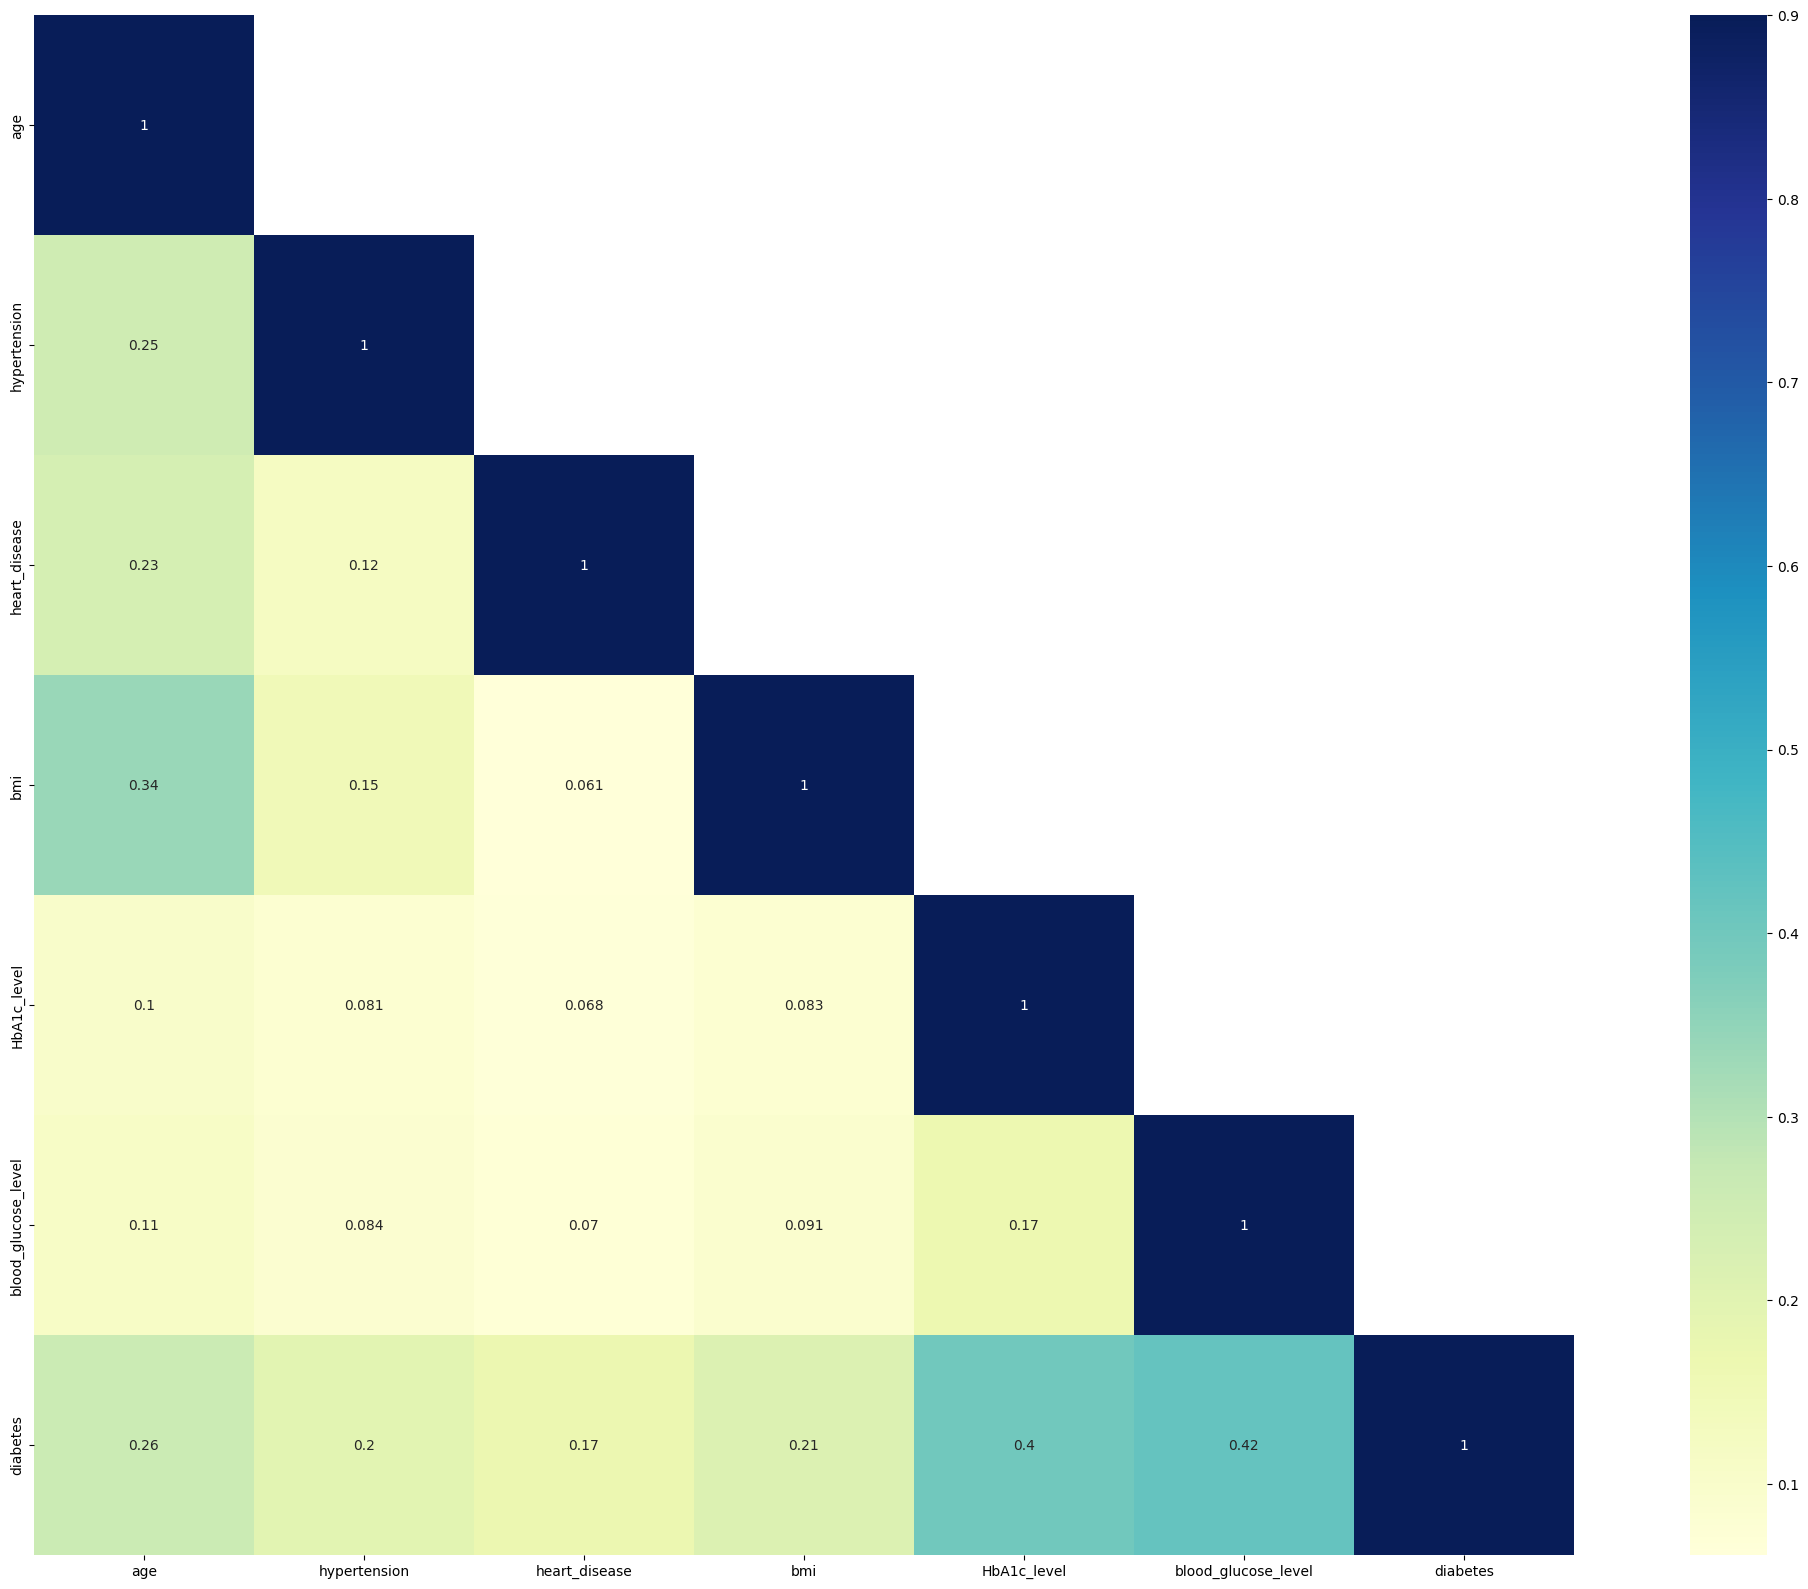

In [31]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,20)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [32]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y_train, Y_test = train_test_split( X2, Y, test_size=0.2, random_state=42)

In [33]:
print(X2.shape, X2_train.shape, X2_test.shape)

(96146, 6) (76916, 6) (19230, 6)


# Logistic Regression


In [34]:
model = LogisticRegression()
model.fit(X2_train,Y_train)

LogisticRegression()

In [35]:
print("Coeff:", model.coef_)
print("Intercept:", model.intercept_)

Coeff: [[ 0.05275452  0.09100342  2.32829408  0.03318054 -0.00978981 -0.03873006]]
Intercept: [-27.33363081]


In [36]:
Y_train_predict = model.predict(X2_train)
Y_test_predict = model.predict(X2_test)
Y_train_predict_df = pd.DataFrame(Y_train_predict)
df_Y_train = pd.concat([X2_train,Y_train_predict_df],axis=1)
df_Y_train.head()

,age,bmi,HbA1c_level,blood_glucose_level,gender,smoking_history,0
46612,35.0,31.53,6.6,155.0,0.0,0.0,0.0
31612,0.4,15.19,4.0,130.0,0.0,0.0,0.0
96143,60.0,20.90,6.5,100.0,0.0,0.0,NaN
95691,66.0,27.05,6.0,130.0,0.0,0.0,NaN
37658,48.0,24.05,4.8,145.0,0.0,0.0,0.0


In [37]:
print("accuracy score - Train:\n", accuracy_score(Y_train,Y_train_predict))
print("classifcation report - Train :\n",classification_report(Y_train,Y_train_predict))

accuracy score - Train:
 0.9587862083311665
classifcation report - Train :
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     70155
           1       0.88      0.62      0.72      6761

    accuracy                           0.96     76916
   macro avg       0.92      0.80      0.85     76916
weighted avg       0.96      0.96      0.96     76916



Area Under Curve: 0.8028339472064986


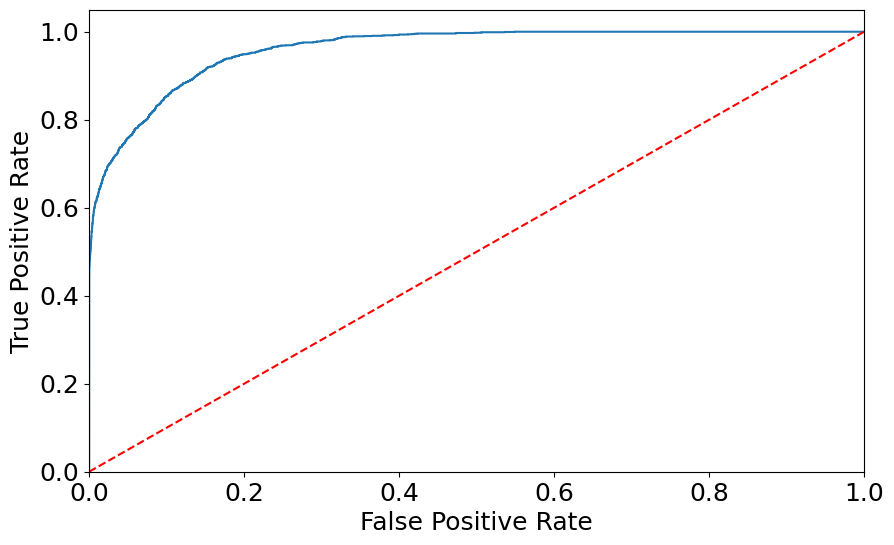

In [38]:
plt.rc("font",size=18)
auc = roc_auc_score(Y_test, model.predict(X2_test))
print("Area Under Curve:",auc)
false_positive, true_positive, thresholds = roc_curve(Y_test, model.predict_proba(X2_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(false_positive, true_positive, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf = RandomForestClassifier(n_estimators=10,random_state=0)
clf.fit(X2_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [41]:
model.score(X2_test, Y_test)

0.9577223088923557

In [42]:
# Make predictions on the test set
Y_pred = clf.predict(X2_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9652106084243369


# SVM

In [43]:
sc = StandardScaler()
sc.fit(X2_train)
X2_train_std = sc.transform(X2_train)
X2_test_std = sc.transform(X2_test)

In [44]:
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [45]:
svc.fit(X2_train_std, Y_train)

SVC(kernel='linear', random_state=1)

In [46]:
Y_predict = svc.predict(X2_test_std)

In [47]:
print("Accuracy score %.3f" %metrics.accuracy_score(Y_test, Y_predict))

Accuracy score 0.958


In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.93      0.57      0.71      1721

    accuracy                           0.96     19230
   macro avg       0.94      0.78      0.84     19230
weighted avg       0.96      0.96      0.95     19230



# Naive Bayes

In [49]:
gnb = GaussianNB()

In [50]:
gnb.fit(X2_train, Y_train)

GaussianNB()

In [51]:
Y_pre = gnb.predict(X2_test)
Y_pre

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
print("Accuracy score %.3f" %metrics.accuracy_score(Y_test, Y_pre))

Accuracy score 0.609


In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pre))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     17509
           1       0.19      0.99      0.31      1721

    accuracy                           0.61     19230
   macro avg       0.59      0.78      0.52     19230
weighted avg       0.93      0.61      0.69     19230

